<a href="https://colab.research.google.com/github/nandarosma/ANALISIS-ALGORITMA-SUPPORT-VECTOR-MACHINE-UNTUK-KLASIFIKASI-OBAT-TERHADAP-PASIEN/blob/main/Precision_Medicine_Through_Support_Vector_Machines_Analyzing_Patient_Data_for_Improved_Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# df = pd.read_csv('drug200.csv')
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
print("data shape : ", df.shape)

data shape :  (200, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:
df.Sex.value_counts()

,count
Sex,
M,104
F,96


<Axes: xlabel='Age', ylabel='Count'>

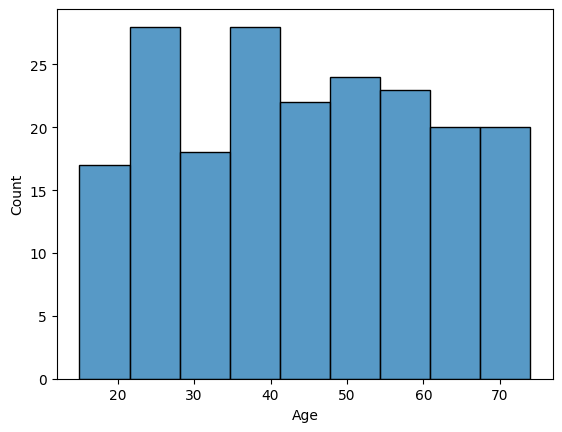

In [ ]:
sns.histplot(df['Age'])

CLEANING DATA

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

0

Exploratory Data Analysis (EDA)

<ipython-input-10-2fea0567788a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Drug', data=df, palette='flare')


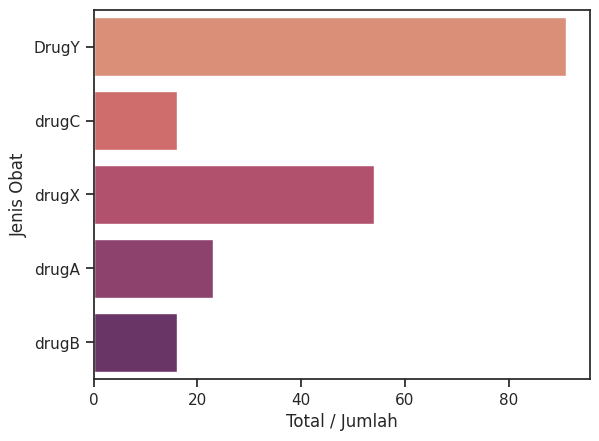

In [ ]:
sns.set_theme(style='ticks')
sns.countplot(y='Drug', data=df, palette='flare')
plt.ylabel("Jenis Obat")
plt.xlabel('Total / Jumlah')
plt.show()

<ipython-input-11-c34aeaa5794f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='rocket')


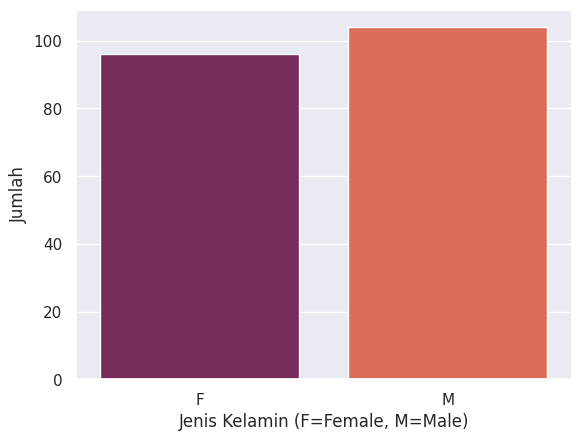

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Sex', data=df, palette='rocket')
plt.ylabel("Jumlah")
plt.xlabel('Jenis Kelamin (F=Female, M=Male)')
plt.show()

Data Preparation

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
X = df.drop(columns = ['Drug'])
y = df['Drug']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (200, 5)
y :  (200,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Jumlah data training sebanyak:', len(x_train))
print('Jumlah data test sebanyak:', len(x_test))

Jumlah data training sebanyak: 160
Jumlah data test sebanyak: 40


In [ ]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (160, 5)
y_train : (160,)
x_test : (40, 5)
y_test : (40,)


Modelling

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

svc_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Akurasi SVM : {:.2f}%'.format(svc_acc * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Akurasi SVM : 100.00%


In [ ]:
# Import library yang diperlukan
import pandas as pd

# Unggah dataset
from google.colab import files
uploaded = files.upload()

# Membaca dataset
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Menampilkan informasi tentang dataset
print("Informasi Dataset:")
print(data.info())
print("\nData Sample:")
print(data.head())

# Rumus Slovin untuk menghitung jumlah sampel
def slovin_formula(population_size, margin_of_error):
    """
    Menghitung jumlah sampel menggunakan rumus Slovin.
    Args:
        population_size (int): Ukuran populasi (N).
        margin_of_error (float): Margin of error (e).
    Returns:
        float: Jumlah sampel minimum.
    """
    return population_size / (1 + population_size * (margin_of_error ** 2))

# Ukuran populasi Indonesia (278 juta jiwa)
population_size = 278_000_000

# Margin of error (bisa disesuaikan)
margin_of_error = 0.05  # 5%

# Menghitung jumlah sampel minimum menggunakan rumus Slovin
sample_size = slovin_formula(population_size, margin_of_error)
print(f"\nUkuran populasi: {population_size}")
print(f"Margin of error: {margin_of_error * 100}%")
print(f"Jumlah sampel minimum (rumus Slovin): {sample_size:.2f}")

# Membandingkan dengan data dalam dataset
dataset_size = len(data)
print(f"\nJumlah data dalam dataset: {dataset_size}")

# Jika populasi dianggap sangat besar (infinite universe)
infinite_sample_size = 1 / (margin_of_error ** 2)
print(f"Jumlah sampel minimum (populasi sangat besar): {infinite_sample_size:.0f}")

Saving drug200.csv to drug200 (1).csv
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None

Data Sample:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

Ukuran populasi: 278000000
Margin of error: 5.0%
Jumlah sampel minimum (rumus Slovin): 400.00

Jumlah data dalam dataset: 200
Jumlah sampel